# Task 1.2: Apply Quantum Operations (Part 1)
## Objective 1a: The Fundamental Circuit Library

**Overview:**
This notebook covers the basic building blocks of Qiskit.
*   **Standard Gates:** Pauli, Hadamard, Controlled Gates.
*   **Directives:** Measurements, Barriers, Resets.
*   **Arithmetic:** Basic adders and basis changes (QFT).

In [1]:
# Setup: Import necessary libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter, Instruction, Gate
from qiskit.circuit.library import *
import numpy as np
import matplotlib.pyplot as plt

print("Libraries imported successfully.")

Libraries imported successfully.


### Standard Gates

* Reversible and unitary  quantum gates
* Includes abstract operations that are defined by mathematical action like ```MCXGate``` and it can be implmented with diffrent decompositions
* Also includes structutal operations, they have unique decompositions, they are implemented as a function that returns a quantum circuit like ```real_amplitudes```

In [5]:
from qiskit.circuit.library import XGate

xgate = XGate()
print (f"XGate Matrix:\n{xgate.to_matrix()}")
print(f"√X Matrix:\n{xgate.power(1/2).to_matrix()}")
print(f"CX Gate:\n{xgate.control(1).to_matrix()}")
print(f"CX Gate:\n{xgate.control(1)}")


XGate Matrix:
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
√X Matrix:
[[0.5+0.5j 0.5-0.5j]
 [0.5-0.5j 0.5+0.5j]]
CX Gate:
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]
CX Gate:
Instruction(name='cx', num_qubits=2, num_clbits=0, params=[])


In [13]:
from qiskit.circuit.library import get_standard_gate_name_mapping

print(f"Standard Gates in Qiskit:{get_standard_gate_name_mapping().keys()}")

Standard Gates in Qiskit:dict_keys(['id', 'sx', 'x', 'cx', 'rz', 'r', 'c3sx', 'ccx', 'dcx', 'ch', 'cp', 'crx', 'cry', 'crz', 'cswap', 'csx', 'cu', 'cu1', 'cu3', 'cy', 'cz', 'ccz', 'global_phase', 'h', 'p', 'rccx', 'rcccx', 'rx', 'rxx', 'ry', 'ryy', 'rzz', 'rzx', 'xx_minus_yy', 'xx_plus_yy', 'ecr', 's', 'sdg', 'cs', 'csdg', 'swap', 'iswap', 'sxdg', 't', 'tdg', 'u', 'u1', 'u2', 'u3', 'y', 'z', 'delay', 'reset', 'measure'])


#### One qubit Standard Gates

* HGate -->	Single-qubit Hadamard gate.
* IGate -->	Identity gate.
* PhaseGate -->	Single-qubit rotation about the Z axis.
* RGate -->	Rotation by angle θ around the cos⁡(ϕ)x+sin⁡(ϕ)y axis R(θ,ϕ).
* RXGate -->	Single-qubit rotation about the X axis.
* RYGate -->	Single-qubit rotation about the Y axis.
* RZGate -->	Single-qubit rotation about the Z axis.
* SGate -->	Single qubit S gate (Z**0.5).
* SdgGate -->	Single qubit S-adjoint gate (~Z**0.5).
* SXGate -->	The single-qubit Sqrt(X) gate (SX).
* SXdgGate -->	The inverse single-qubit Sqrt(X) gate.
* TGate -->	Single qubit T gate (Z**0.25).
* TdgGate -->	Single qubit T-adjoint gate (~Z**0.25).
* UGate -->	Generic single-qubit rotation in terms of ZYZ Euler angles.
* U1Gate -->	Single-qubit rotation about the Z axis.
* U2Gate -->	Single-qubit rotation about the X+Z axis.
* U3Gate -->	Generic single-qubit rotation gate with 3 Euler angles.
* XGate -->	The single-qubit Pauli-X gate (σx​).
* YGate -->	The single-qubit Pauli-Y gate (σy​).
* ZGate -->	The single-qubit Pauli-Z gate (σz​).

In [3]:
from qiskit.circuit.library import HGate

hgate=HGate()
print (f"Hadamrad Gate Matrix:{hgate.to_matrix()}")

Hadamrad Gate Matrix:[[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]


In [4]:
from qiskit.circuit.library import SXdgGate

sxdggate=SXdgGate()
print (f"SX Dagger Gate Matrix:{sxdggate.to_matrix()}")

SX Dagger Gate Matrix:[[0.5-0.5j 0.5+0.5j]
 [0.5+0.5j 0.5-0.5j]]


#### Two qubits Standard Gates

* CHGate -->	Controlled-Hadamard gate.
* CPhaseGate -->	Controlled-Phase gate.
* CRXGate -->	Controlled-RX gate.
* CRYGate -->	Controlled-RY gate.
* CRZGate -->	Controlled-RZ gate.
* CSGate -->	Controlled-S gate.
* CSdgGate -->	Controlled-S^dagger gate.
* CSXGate -->	Controlled-√X gate.
* CUGate -->	Controlled-U gate (4-parameter two-qubit gate).
* CU1Gate -->	Controlled-U1 gate.
* CU3Gate -->	Controlled-U3 gate (3-parameter two-qubit gate).
* CXGate -->	Controlled-X gate.
* CYGate -->	Controlled-Y gate.
* CZGate -->	Controlled-Z gate.
* DCXGate -->	Double-CNOT gate.
* ECRGate -->	An echoed cross-resonance gate.
* iSwapGate -->	iSWAP gate.
* RXXGate -->	Rxx(ϕ)=(- ϕ/2 XX) A parametric 2-qubit XX=X⊗X interaction (simulating Hamiltonian H=XX, rotation about XX).
* RYYGate -->	Ryy(ϕ)=(- ϕ/2 YY) A parametric 2-qubit YY=Y⊗Y interaction (simulating Hamiltonian H=YY), rotation about YY)
* RZXGate -->	Rzx(ϕ)=(- ϕ/2 ZX) A parametric 2-qubit ZX=Z⊗X interaction (simulating Hamiltonian H=ZX, rotation about ZX)
* RZZGate -->	Rzz(ϕ)=(- ϕ/2 ZZ) A parametric 2-qubit ZZ=Z⊗Z interaction (simulating Hamiltonian H=ZZ, rotation about ZZ)
* SwapGate -->	The SWAP gate.
* XXMinusYYGate -->	XX-YY interaction gate.
* XXPlusYYGate -->	XX+YY interaction gate.

In [5]:
from qiskit.circuit.library import CHGate

chgate=CHGate()
print (f"Controlled Hadamard Gate Matrix:\n{chgate.to_matrix()}")

Controlled Hadamard Gate Matrix:
[[ 1.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.70710678+0.j  0.        +0.j  0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  1.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.70710678+0.j  0.        +0.j -0.70710678+0.j]]


In [6]:
from qiskit.circuit.library import SwapGate

swapgate=SwapGate()
print (f"SwapGate Matrix:\n{swapgate.to_matrix()}")

SwapGate Matrix:
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


#### Three+ qubit Standard Gates 

* C3SXGate -->	The 3-qubit controlled sqrt-X gate.
* C3XGate -->	The X gate controlled on 3 qubits.
* C4XGate -->	The 4-qubit controlled X gate.
* CCXGate -->	CCX gate, also known as Toffoli gate.
* CCZGate -->	CCZ gate.
* CSwapGate -->	Controlled-SWAP gate, also known as the Fredkin gate.
* RCCXGate -->	The simplified Toffoli gate, also referred to as Margolus gate.
* RC3XGate -->	The simplified 3-controlled Toffoli gate.

In [18]:
from qiskit.circuit.library import CCXGate

ccxgate=CCXGate()
print (f"Toffoli Gate Matrix:\n{ccxgate.to_matrix()}")

Toffoli Gate Matrix:
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


#### Global Standard Gates 

* GlobalPhaseGate -->	The global phase gate (e^iθ).

In [8]:
from qiskit.circuit.library import GlobalPhaseGate
import numpy as py

gpgate=GlobalPhaseGate(py.pi/2)
print (f"Global Phase Matrix:{ccxgate.to_matrix()}")

Global Phase Matrix:[[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


### Standard Directives

* Operations meant to be interpreted by the backend or transpiler like ```Barrier```

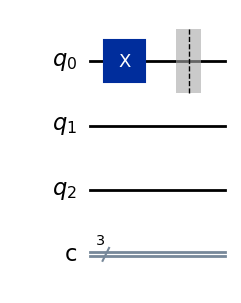

In [17]:
from qiskit.circuit import QuantumCircuit
from qiskit.circuit.library import Barrier

b=Barrier(1)
qc= QuantumCircuit(3,3)
qc.compose(xgate).compose(b).draw('mpl')

### Standard Operations

* Measure --> Measurement in the computational basis
* Reset --> Reset a Qubit to |0> 

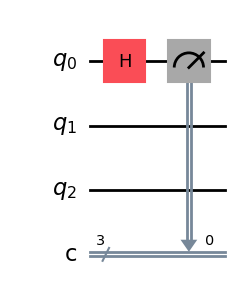

In [10]:
from qiskit.circuit.library import Measure
measure =Measure()
qc.compose(hgate).compose(measure).draw('mpl')

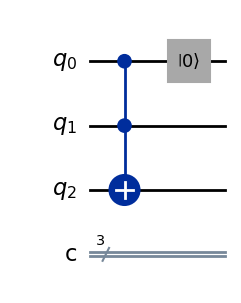

In [19]:
from qiskit.circuit.library import Reset
reset =Reset()
qc.compose(ccxgate).compose(reset).draw('mpl')

### Generalized Gates

* Extends the standard gates 
* contains variadic gates  "number of qubits depends on the input"
* It is recommended to use Gates that derive ```Instrcution``` or ```Gate``` instead of ```QuantumCircuit``` , as the former allows the compiler to reason about it on an abstract level , while the latter is eagerly constructed

In [12]:
from qiskit.circuit.library import DiagonalGate
 
diagonal = DiagonalGate([1, 1j])
print(diagonal.num_qubits)
 
diagonal = DiagonalGate([1, 1, 1, -1])
print(diagonal.num_qubits)

1
2


The following gates derive ```Gate``` or ```Insturction```


* DiagonalGate -->	A generic diagonal quantum gate.
* PermutationGate -->	A gate that permutes qubits.
* MCMTGate -->	The multi-controlled multi-target gate, for an arbitrary singly controlled target gate.
* MCPhaseGate -->	Multi-controlled-Phase gate.
* MCXGate -->	The general, multi-controlled X gate.
* MSGate -->	The Mølmer–Sørensen gate.
* RVGate -->	Rotation around arbitrary rotation axis v where ∥v∥2​ is angle of rotation in radians.
* PauliGate -->	A multi-qubit Pauli gate.
* LinearFunction -->	A linear reversible circuit on n qubits.
* Isometry -->	Decomposition of arbitrary isometries from mm to nn qubits.
* UnitaryGate -->	Class quantum gates specified by a unitary matrix.
* UCGate -->	Uniformly controlled gate (also called multiplexed gate).
* UCPauliRotGate -->	Uniformly controlled Pauli rotations.
* UCRXGate -->	Uniformly controlled Pauli-X rotations.
* UCRYGate -->	Uniformly controlled Pauli-Y rotations.
* UCRZGate -->	Uniformly controlled Pauli-Z rotations.

The following gates derive ```QuantumCircuit```

* Diagonal -->	Circuit implementing a diagonal transformation.
* MCMT -->	The multi-controlled multi-target gate, for an arbitrary singly controlled target gate.
* MCMTVChain -->	The MCMT implementation using the CCX V-chain.
* MCXGrayCode -->	Implement the multi-controlled X gate using the Gray code.
* MCXRecursive -->	Implement the multi-controlled X gate using recursion.
* MCXVChain -->	Implement the multi-controlled X gate using a V-chain of CX gates.
* Permutation -->	An n_qubit circuit that permutes qubits.
* GMS -->	Global Mølmer–Sørensen gate.
* GR -->	Global R gate.
* GRX -->	Global RX gate.
GRY(num_qubits, theta)	Global RY gate.
GRZ(num_qubits, phi)	Global RZ gate.
Boolean Logic

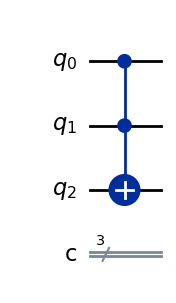

In [13]:
from qiskit.circuit.library import MCXGate

mcxgate = MCXGate(num_ctrl_qubits=2)
qc.compose(mcxgate).draw('mpl')

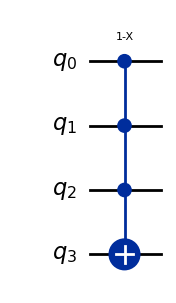

In [20]:
from qiskit.circuit.library import MCMTGate

mcmtGate = MCMTGate(gate=xgate,num_ctrl_qubits=3,num_target_qubits=1)
qc= QuantumCircuit(4,0)
qc.compose(mcmtGate).draw('mpl')

### Boolean Logic Gates

The following gates derive ```Gate```

* AndGate -->	A gate representing the logical AND operation on a number of qubits.
* OrGate -->	A gate representing the logical OR operation on a number of qubits.
* BitwiseXorGate -->	An n-qubit gate for bitwise xor-ing the input with some integer amount.
* InnerProductGate -->	A 2n-qubit Boolean function that computes the inner product of two n-qubit vectors over F2.

The following gates derive ```QuantumCircuit```

* AND -->	A circuit implementing the logical AND operation on a number of qubits.
* OR -->	A circuit implementing the logical OR operation on a number of qubits.
* XOR -->	An n_qubit circuit for bitwise xor-ing the input with some integer amount.
* InnerProduct -->	A 2n-qubit Boolean function that computes the inner product of two n-qubit vectors over F2​.

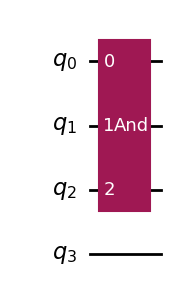

In [15]:
from qiskit.circuit.library import AndGate

andgate = AndGate(num_variable_qubits=2)

qc.compose(andgate).draw('mpl')

### Basis Change Gates

* performs basis transformation of the qubit states like ```QFTGate```

The following gate derive ```Gate```

* QFTGate -->	Quantum Fourier Transform Gate.

The following gate derive ```QuantumCircuit```

* QFT -->	Quantum Fourier Transform Circuit.

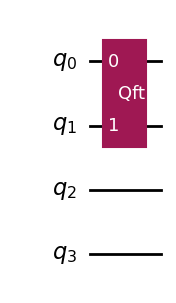

In [16]:
from qiskit.circuit.library import QFTGate

qftgate=QFTGate(2)
qc.compose(qftgate).draw('mpl')

### Arithmetic Gates

#### Adder Gates

The following gates derive ```Gate```

* ModularAdderGate -->	Compute the sum modulo $2^n$ of two n-sized qubit registers.
* HalfAdderGate -->	Compute the sum of two equally-sized qubit registers, including a carry-out bit.
* FullAdderGate -->	Compute the sum of two n-sized qubit registers, including carry-in and -out bits.

The following gates derive ```QuantumCircuit```

* DraperQFTAdder -->	A circuit that uses QFT to perform in-place addition on two qubit registers.
* CDKMRippleCarryAdder -->	A ripple-carry circuit to perform in-place addition on two qubit registers.
* VBERippleCarryAdder -->	The VBE ripple carry adder [1].

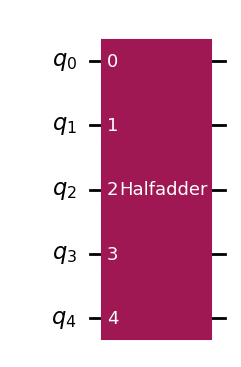

In [17]:
from qiskit.circuit.library import HalfAdderGate

qc=QuantumCircuit(5)
hagate=HalfAdderGate(2)
qc.compose(hagate).draw('mpl')

#### Multipliers

The following gate derive ```Gate```

* MultiplierGate -->	Compute the product of two equally sized qubit registers into a new register.

The following gates derive ```QuantumCircuit```

* HRSCumulativeMultiplier -->	A multiplication circuit to store product of two input registers out-of-place.
* RGQFTMultiplier -->	A QFT multiplication circuit to store product of two input registers out-of-place.

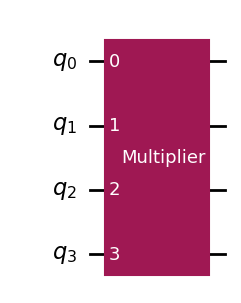

In [18]:
from qiskit.circuit.library import MultiplierGate

qc=QuantumCircuit(4)
mgate=MultiplierGate(1,2)
qc.compose(mgate).draw('mpl')

#### Amplitude Functions

The following gate derive ```Gate```

* LinearAmplitudeFunctionGate -->	A circuit implementing a (piecewise) linear function on qubit amplitudes. In general, the function f = slope*x+offset is defined from some interval 
[a,b], the domain, to [c,d], the image.

The following gates derive ```QuantumCircuit```

* LinearAmplitudeFunction -->	A circuit implementing a (piecewise) linear function on qubit amplitudes.

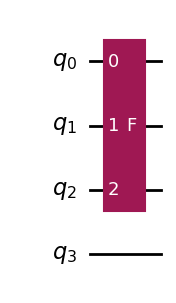

In [25]:
from qiskit.circuit.library import LinearAmplitudeFunctionGate

qc=QuantumCircuit(4)
lafgate=LinearAmplitudeFunctionGate(num_state_qubits=2,slope=1.0,offset=0,domain=[0,1],image=[0,1,2,3])
qc.compose(lafgate).draw('mpl')

#### Functional Pauli Rotations

The following gate derive ```Gate```

* LinearPauliRotationsGate -->	Linearly-controlled X, Y or Z rotation.
* PolynomialPauliRotationsGate -->	A gate implementing polynomial Pauli rotations.
* PiecewiseLinearPauliRotationsGate -->	Piecewise-linearly-controlled Pauli rotations.
* PiecewisePolynomialPauliRotationsGate -->	Piecewise-polynomially-controlled Pauli rotations.
* PiecewiseChebyshevGate -->	Piecewise Chebyshev approximation to an input function.

The following gates derive ```QuantumCircuit```

* FunctionalPauliRotations -->	Base class for functional Pauli rotations.
* LinearPauliRotations -->	Linearly-controlled X, Y or Z rotation.
* PolynomialPauliRotations -->	A circuit implementing polynomial Pauli rotations.
* PiecewiseLinearPauliRotations -->	Piecewise-linearly-controlled Pauli rotations.
* PiecewisePolynomialPauliRotations -->	Piecewise-polynomially-controlled Pauli rotations.
* PiecewiseChebyshev -->	Piecewise Chebyshev approximation to an input function.


# Example - LinearPauliRotations

The example below utilizes the **`LinearPauliRotations`** class from the Qiskit library. Based on the provided classification, this component falls under the category of **classes that derive from `QuantumCircuit`**.

### 1. Overview
`LinearPauliRotations` is a specialized quantum circuit library component. It implements a controlled rotation where the rotation angle is determined by a linear function of the integer value stored in the state (control) qubits.

### 2. Mathematical Definition
The circuit applies a rotation $R_{basis}(\theta)$ to the target qubits, where the angle $\theta$ is calculated as:

$$ \theta = \text{slope} \times x + \text{offset} $$

*   **$x$**: The integer value represented by the state (control) qubits.
*   **slope**: The rate of change of the angle per integer step.
*   **offset**: The starting angle when $x = 0$.
*   **basis**: The axis of rotation ($X, Y,$ or $Z$).

### 3. Implementation in the Script
In `quantum_example.py`, the circuit is instantiated with the following configuration:

*   **Basis:** `'Y'` (Implements $R_y$ rotations).
*   **State Qubits:** 2 (These act as the input $x$, allowing integer values $0, 1, 2, 3$).
*   **Equation:** $\theta = 0.5x + 0.2$.

```python
lpr_circuit = LinearPauliRotations(
    num_state_qubits=2,
    slope=0.5,
    offset=0.2,
    basis='Y'
)
```

### 4. Component Classification
As noted in your classification list, this class derives from `QuantumCircuit`, not `Gate`.

*   **Why it matters:** Because it is a `QuantumCircuit`, it is a composite object built from standard primitive gates (like CNOTs and single-qubit rotations).
*   **Usage:** In the script, it is treated as a block and added to the main circuit using the `.append()` method:
    ```python
    # qc.append(circuit_object, qubit_indices)
    qc.append(lpr_circuit, range(num_state_qubits + num_target_qubits))
    ```

### 5. Circuit Structure
When `lpr_circuit.decompose().draw()` is called in the script, it reveals the internal structure:
1.  **Input:** A register of "state" qubits and a register of "target" qubits.
2.  **Operations:** It uses a sequence of controlled rotations (often decomposed into CNOTs and single-qubit rotations) to effectively "add" the rotation contributions from each state qubit according to the linear formula.

In [21]:
try:
    from qiskit import QuantumCircuit
    from qiskit.circuit.library import LinearPauliRotations
except ImportError:
    print("Error: Qiskit is not installed. Please install it using 'pip install qiskit'.")
    exit(1)

def example_linear_pauli_rotations():
    """
    Demonstrates the LinearPauliRotations circuit.
    
    LinearPauliRotations implements a rotation where the angle is a linear function 
    of the state of a control register.
    
    Rotation angle: theta = slope * x + offset
    where x is the integer value of the control register.
    """
    
    # Parameters for the linear function
    slope = 0.5
    offset = 0.2
    
    # Define the number of state qubits (control) and target qubits
    num_state_qubits = 2
    num_target_qubits = 1
    
    # Create the LinearPauliRotations circuit
    # basis='Y' means we are doing Ry rotations
    lpr_circuit = LinearPauliRotations(
        num_state_qubits=num_state_qubits,
        slope=slope,
        offset=offset,
        basis='Y'
    )
    
    print("--- LinearPauliRotations Circuit ---")
    print(lpr_circuit.draw())
    
    # To see the implementation details (decomposition)
    print("\n--- Decomposed Circuit ---")
    print(lpr_circuit.decompose().draw())

    # Example of integrating into a larger circuit
    print("\n--- Integrated into larger circuit ---")
    qc = QuantumCircuit(num_state_qubits + num_target_qubits)
    
    # Initialize state qubits (e.g., to superposition)
    qc.h(range(num_state_qubits))
    
    # Append the LinearPauliRotations circuit
    # The first 'num_state_qubits' are controls, the last 'num_target_qubits' are targets
    qc.append(lpr_circuit, range(num_state_qubits + num_target_qubits))
    
    print(qc.draw())

if __name__ == "__main__":
    try:
        example_linear_pauli_rotations()
    except ImportError:
        print("Error: Qiskit is not installed. Please install it using 'pip install qiskit'.")


--- LinearPauliRotations Circuit ---
         ┌──────────────┐
state_0: ┤0             ├
         │              │
state_1: ┤1 Linpaulirot ├
         │              │
 target: ┤2             ├
         └──────────────┘

--- Decomposed Circuit ---
                                        
state_0: ────────────────■──────────────
                         │              
state_1: ────────────────┼─────────■────
         ┌─────────┐┌────┴────┐┌───┴───┐
 target: ┤ Ry(0.2) ├┤ Ry(0.5) ├┤ Ry(1) ├
         └─────────┘└─────────┘└───────┘

--- Integrated into larger circuit ---
     ┌───┐┌─────────┐
q_0: ┤ H ├┤0        ├
     ├───┤│         │
q_1: ┤ H ├┤1 LinRot ├
     └───┘│         │
q_2: ─────┤2        ├
          └─────────┘


## Practice Questions

**1. What is the effect of applying a Hadamard (H) gate to the state |0>?**

A) |1>

B) |0>

C) $\frac{|0\rangle + |1\rangle}{\sqrt{2}}$

D) $\frac{|0\rangle - |1\rangle}{\sqrt{2}}$

***Answer:***
<Details>
<br/>
C) $\frac{|0\rangle + |1\rangle}{\sqrt{2}}$
</Details>

---

**2. Which Qiskit directive prevents the transpiler from optimizing across a specific boundary in the circuit?**

A) Measure

B) Reset

C) Barrier

D) Delay

***Answer:***
<Details>
<br/>
C) $\frac{|0\rangle + |1\rangle}{\sqrt{2}}$
</Details>

---

**3. The CCX gate (Toffoli) applies an X (NOT) operation to the target qubit if and only if:**

A) Both control qubits are in state |0>

B) Both control qubits are in state |1>

C) One control qubit is in state |1>

D) At least one control qubit is in state |0>

***Answer:***
<Details>
<br/>
B) Both control qubits are in state |1>
</Details>